# <b>PyCaret Classification Example (main components)<b>

Last Update: 02/01/2022

PyCaret Version: 2.2.3

Author: [Aurimas Aleksandras Nausėdas](https://github.com/aurimas13)

# <b> Installation </b>


In [1]:
!pip install pycaret==2.2.3

In [2]:
# Check version
from pycaret.utils import version
print('Confirm PyCaret version 2.2.X?')
print('PyCaret Version: ', version())

Confirm PyCaret version 2.2.X?
PyCaret Version:  2.2.3


# 1. <b> Data Repository<b>

In [3]:
from pycaret.datasets import get_data
index = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [4]:
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


# 2. <b> Initialize Setup <b>

In [5]:
# Import classification from pycaret and make setup
from pycaret.classification import *
clf = setup(data, target='Purchase', session_id=123, log_experiment=True, experiment_name='juice1')

,Description,Value
0,session_id,123
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


# 3. <b> Compare <b>

In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8341,0.0000,0.7594,0.8024,0.7780,0.6460,0.6491,0.0040
lr,Logistic Regression,0.8328,0.8922,0.7382,0.8105,0.7711,0.6400,0.6432,0.3490
lda,Linear Discriminant Analysis,0.8328,0.8921,0.7664,0.7951,0.7782,0.6443,0.6470,0.0060
ada,Ada Boost Classifier,0.8154,0.8847,0.7278,0.7808,0.7517,0.6052,0.6078,0.0170
catboost,CatBoost Classifier,0.8142,0.8921,0.7350,0.7714,0.7512,0.6032,0.6051,0.1340
gbc,Gradient Boosting Classifier,0.8141,0.8865,0.7555,0.7617,0.7566,0.6064,0.6085,0.0190
xgboost,Extreme Gradient Boosting,0.7941,0.8710,0.7313,0.7336,0.7306,0.5642,0.5660,0.0320
lightgbm,Light Gradient Boosting Machine,0.7941,0.8758,0.7278,0.7353,0.7308,0.5641,0.5649,0.0130
rf,Random Forest Classifier,0.7860,0.8673,0.7275,0.7212,0.7213,0.5480,0.5510,0.0470
et,Extra Trees Classifier,0.7713,0.8369,0.7030,0.7019,0.6996,0.5154,0.5181,0.0430


# 4. <b> Create Model<b>

In [7]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8667,0.9445,0.7241,0.9130,0.8077,0.7077,0.7189
1,0.8533,0.9018,0.8621,0.7812,0.8197,0.6966,0.6990
2,0.9067,0.9145,0.8276,0.9231,0.8727,0.7994,0.8024
3,0.8267,0.9100,0.7241,0.8077,0.7636,0.6274,0.6298
4,0.8400,0.9303,0.7241,0.8400,0.7778,0.6538,0.6582
5,0.8933,0.9273,0.8276,0.8889,0.8571,0.7722,0.7735
6,0.7600,0.8058,0.6207,0.7200,0.6667,0.4808,0.4840
7,0.8133,0.8568,0.7500,0.7500,0.7500,0.6011,0.6011
8,0.7838,0.8626,0.6786,0.7308,0.7037,0.5339,0.5348
9,0.7838,0.8649,0.6429,0.7500,0.6923,0.5272,0.5309


In [8]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8400,0.9310,0.6897,0.8696,0.7692,0.6493,0.6595
1,0.8400,0.8958,0.8621,0.7576,0.8065,0.6711,0.6751
2,0.8400,0.9265,0.7586,0.8148,0.7857,0.6583,0.6594
3,0.8000,0.9059,0.7586,0.7333,0.7458,0.5810,0.5812
4,0.8667,0.9355,0.8276,0.8276,0.8276,0.7189,0.7189
5,0.8800,0.9220,0.8966,0.8125,0.8525,0.7517,0.7543
6,0.7200,0.7549,0.6552,0.6333,0.6441,0.4134,0.4136
7,0.7600,0.8271,0.6786,0.6786,0.6786,0.4871,0.4871
8,0.7703,0.8703,0.7143,0.6897,0.7018,0.5150,0.5152
9,0.8243,0.8960,0.7143,0.8000,0.7547,0.6186,0.6210


In [9]:
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8267,0.8773,0.7586,0.7857,0.7719,0.6322,0.6325
1,0.8333,0.8946,0.7069,0.8367,0.7664,0.6382,0.6437
2,0.8533,0.9270,0.8070,0.8070,0.8070,0.6887,0.6887
3,0.6779,0.7697,0.6140,0.5738,0.5932,0.3271,0.3276
4,0.7785,0.8604,0.7018,0.7143,0.7080,0.5296,0.5297
Mean,0.7939,0.8658,0.7177,0.7435,0.7293,0.5632,0.5644
SD,0.0630,0.0528,0.0645,0.0940,0.0751,0.1289,0.1294


In [10]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

In [11]:
ensemble_models = compare_models(include = models(type='ensemble').index.tolist(), fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8195,0.8919,0.7351,0.7822,0.7578,0.6141,0.6150,0.0367
catboost,CatBoost Classifier,0.8142,0.8900,0.7177,0.7810,0.7475,0.6009,0.6027,0.2900
ada,Ada Boost Classifier,0.8074,0.8720,0.7142,0.7709,0.7408,0.5879,0.5897,0.0333
rf,Random Forest Classifier,0.7968,0.8724,0.7178,0.7449,0.7307,0.5677,0.5683,0.0833
lightgbm,Light Gradient Boosting Machine,0.7901,0.8616,0.6933,0.7424,0.7169,0.5504,0.5514,0.0267
xgboost,Extreme Gradient Boosting,0.7861,0.8651,0.6898,0.7358,0.7120,0.5421,0.5429,0.0367
et,Extra Trees Classifier,0.7714,0.8375,0.7037,0.7011,0.7022,0.5167,0.5168,0.0800


# 5. <b> Tune Hyperparameters<b> 

In [12]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8667,0.9483,0.7241,0.9130,0.8077,0.7077,0.7189
1,0.8533,0.9048,0.8621,0.7812,0.8197,0.6966,0.6990
2,0.9067,0.9190,0.8276,0.9231,0.8727,0.7994,0.8024
3,0.8000,0.9123,0.6897,0.7692,0.7273,0.5701,0.5722
4,0.8533,0.9220,0.7241,0.8750,0.7925,0.6806,0.6879
5,0.9067,0.9280,0.8621,0.8929,0.8772,0.8020,0.8023
6,0.7733,0.8133,0.6552,0.7308,0.6909,0.5128,0.5147
7,0.8133,0.8590,0.7500,0.7500,0.7500,0.6011,0.6011
8,0.8108,0.8649,0.7500,0.7500,0.7500,0.5978,0.5978
9,0.7838,0.8657,0.6429,0.7500,0.6923,0.5272,0.5309


In [13]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8667,0.9108,0.7931,0.8519,0.8214,0.7153,0.7164
1,0.8400,0.9100,0.9310,0.7297,0.8182,0.6790,0.6951
2,0.8533,0.9340,0.8966,0.7647,0.8254,0.7003,0.7069
3,0.8267,0.8973,0.8621,0.7353,0.7937,0.6458,0.6519
4,0.8533,0.9400,0.8966,0.7647,0.8254,0.7003,0.7069
5,0.8533,0.9382,0.9310,0.7500,0.8308,0.7040,0.7168
6,0.7467,0.7736,0.7931,0.6389,0.7077,0.4887,0.4976
7,0.7467,0.8153,0.8571,0.6154,0.7164,0.4984,0.5209
8,0.8108,0.8800,0.8571,0.7059,0.7742,0.6140,0.6226
9,0.7838,0.8898,0.7857,0.6875,0.7333,0.5529,0.5564


# 6. <b> Ensemble Model<b> 

In [14]:
bagged_gbc = ensemble_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8533,0.9430,0.7586,0.8462,0.8000,0.6848,0.6873
1,0.8400,0.9160,0.8276,0.7742,0.8000,0.6669,0.6679
2,0.8667,0.9303,0.7931,0.8519,0.8214,0.7153,0.7164
3,0.7867,0.9100,0.7241,0.7241,0.7241,0.5502,0.5502
4,0.8533,0.9505,0.7931,0.8214,0.8070,0.6888,0.6891
5,0.8533,0.9168,0.7931,0.8214,0.8070,0.6888,0.6891
6,0.7333,0.7946,0.6552,0.6552,0.6552,0.4378,0.4378
7,0.7733,0.8507,0.6786,0.7037,0.6909,0.5121,0.5123
8,0.7703,0.8835,0.7500,0.6774,0.7119,0.5217,0.5235
9,0.7973,0.8804,0.7143,0.7407,0.7273,0.5661,0.5663


In [15]:
boosted_gbc = ensemble_model(gbc, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8533,0.9025,0.7241,0.8750,0.7925,0.6806,0.6879
1,0.8400,0.8928,0.8276,0.7742,0.8000,0.6669,0.6679
2,0.8267,0.9160,0.7241,0.8077,0.7636,0.6274,0.6298
3,0.7867,0.8816,0.6897,0.7407,0.7143,0.5444,0.5453
4,0.7600,0.8943,0.7241,0.6774,0.7000,0.5004,0.5011
5,0.8533,0.9179,0.8621,0.7812,0.8197,0.6966,0.6990
6,0.6933,0.7354,0.5862,0.6071,0.5965,0.3493,0.3494
7,0.7333,0.8165,0.5714,0.6667,0.6154,0.4131,0.4160
8,0.7162,0.8362,0.6786,0.6129,0.6441,0.4091,0.4106
9,0.7973,0.8665,0.7500,0.7241,0.7368,0.5721,0.5723


# 7. <b> Blend Models<b> 

In [16]:
blender = blend_models(estimator_list = [boosted_gbc, bagged_gbc, tuned_rf], method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8800,0.9325,0.8276,0.8571,0.8421,0.7454,0.7457
1,0.8400,0.9153,0.8276,0.7742,0.8000,0.6669,0.6679
2,0.8933,0.9423,0.8966,0.8387,0.8667,0.7779,0.7791
3,0.8000,0.9048,0.7931,0.7188,0.7541,0.5862,0.5883
4,0.8667,0.9483,0.8276,0.8276,0.8276,0.7189,0.7189
5,0.8800,0.9280,0.8966,0.8125,0.8525,0.7517,0.7543
6,0.7333,0.7766,0.6552,0.6552,0.6552,0.4378,0.4378
7,0.7867,0.8332,0.7857,0.6875,0.7333,0.5569,0.5603
8,0.7703,0.8781,0.7500,0.6774,0.7119,0.5217,0.5235
9,0.7838,0.8905,0.7143,0.7143,0.7143,0.5404,0.5404


# 8. <b> Stack Models<b> 

In [17]:
stacker = stack_models(estimator_list = [boosted_gbc, bagged_gbc, tuned_rf], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8533,0.9040,0.7241,0.8750,0.7925,0.6806,0.6879
1,0.8000,0.9089,0.7931,0.7188,0.7541,0.5862,0.5883
2,0.8667,0.9190,0.7931,0.8519,0.8214,0.7153,0.7164
3,0.8000,0.8954,0.7931,0.7188,0.7541,0.5862,0.5883
4,0.8400,0.9250,0.8276,0.7742,0.8000,0.6669,0.6679
5,0.8667,0.9160,0.8621,0.8065,0.8333,0.7224,0.7235
6,0.7600,0.7905,0.7241,0.6774,0.7000,0.5004,0.5011
7,0.7200,0.8134,0.7500,0.6000,0.6667,0.4304,0.4384
8,0.7703,0.8548,0.6071,0.7391,0.6667,0.4940,0.4995
9,0.7973,0.8719,0.7143,0.7407,0.7273,0.5661,0.5663


# 9. <b> Analyze Model<b> 

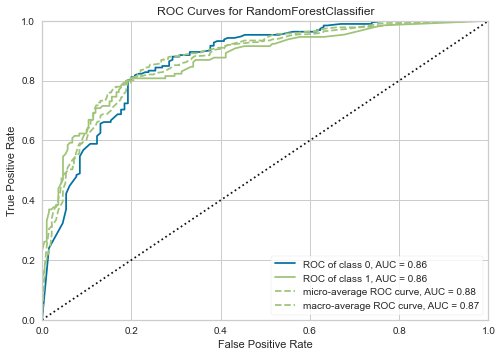

In [18]:
plot_model(rf)

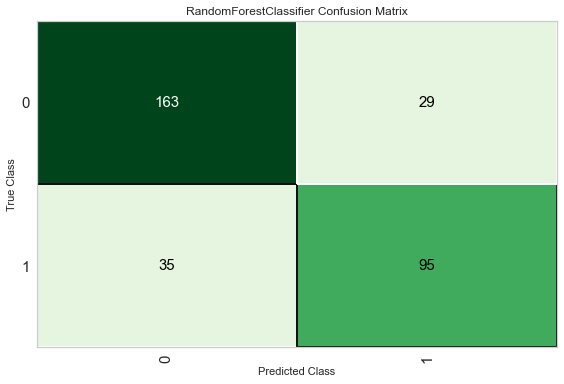

In [19]:
plot_model(rf, plot = 'confusion_matrix')

+ Details of Confusion Matrix Metrics (TP, TN, FP, FN) found under Examples folder on my Github as Machine_Learning_with_Python_session_2.ipynb file.

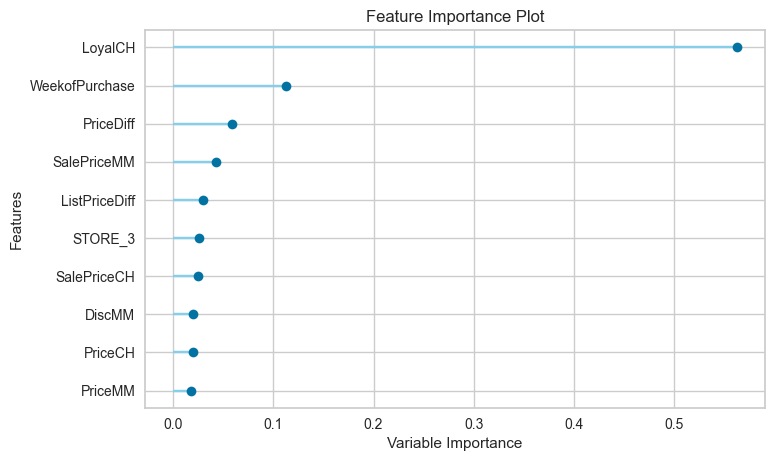

In [20]:
plot_model(rf, plot = 'feature')

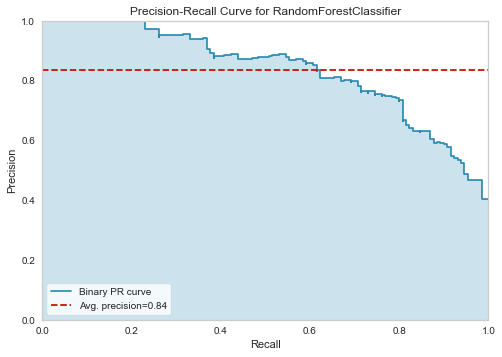

In [21]:
plot_model(rf, plot='pr')

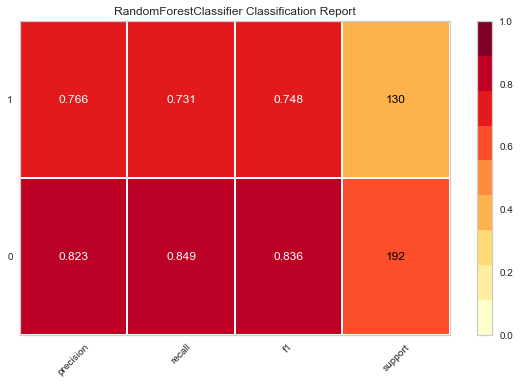

In [22]:
plot_model(rf, plot = 'class_report')

+ Details of Precision, Recall and F1 Metrics found under Examples folder on my Github as Machine_Learning_with_Python_session_2.ipynb file.

In [23]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. <b> Interpret Model<b> 

In [24]:
catboost = create_model('catboost', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.823,0.8966,0.7231,0.8174,0.7673,0.6254,0.6284


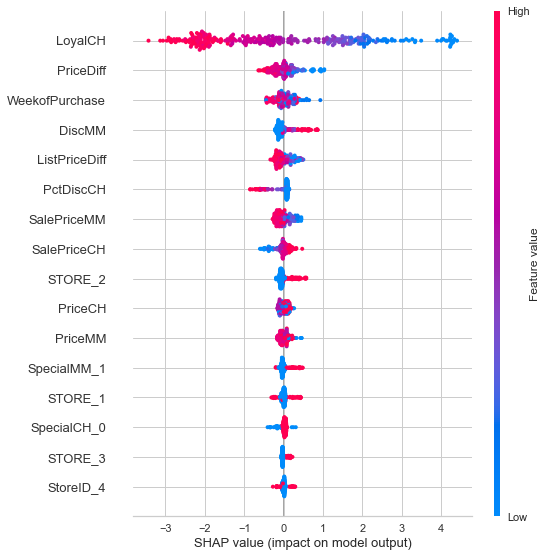

In [25]:
interpret_model(catboost)

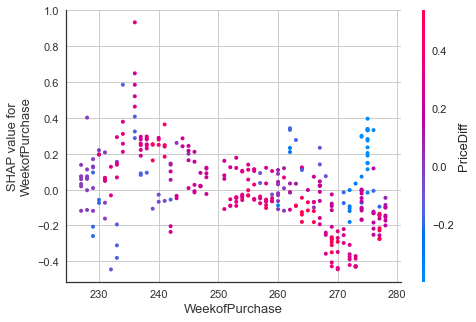

In [26]:
interpret_model(catboost, plot = 'correlation')

In [27]:
interpret_model(catboost, plot = 'reason', observation = 12)

# 11. <b>AutoML()<b>

In [28]:
best = automl(optimize = 'Recall')
best

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

# 12. <b>Predict Model<b>

In [29]:
pred_holdouts = predict_model(lr)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8261,0.9079,0.7231,0.8246,0.7705,0.6315,0.6350


,WeekofPurchase,PriceCH,PriceMM,DiscMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscCH,ListPriceDiff,StoreID_4,SpecialCH_0,SpecialMM_1,STORE_1,STORE_2,STORE_3,Purchase,Label,Score
0,271.0,1.99,2.09,0.4,0.600000,1.69,1.89,-0.20,0.050251,0.10,0.0,0.0,0.0,0.0,0.0,1.0,MM,MM,0.5379
1,278.0,2.09,2.09,0.0,0.986489,2.09,1.89,0.20,0.095694,0.00,0.0,1.0,0.0,0.0,0.0,1.0,CH,CH,0.9397
2,255.0,1.89,2.18,0.0,0.680000,2.18,1.76,0.42,0.068783,0.29,0.0,1.0,0.0,0.0,1.0,0.0,CH,CH,0.8540
3,258.0,1.76,2.18,0.0,0.320000,2.18,1.76,0.42,0.000000,0.42,0.0,1.0,0.0,1.0,0.0,0.0,CH,CH,0.5297
4,278.0,1.99,2.18,0.0,0.600000,2.18,1.99,0.19,0.000000,0.19,0.0,1.0,0.0,0.0,1.0,0.0,CH,CH,0.6793


In [30]:
new_data = data.copy()
new_data.drop(['Purchase'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head(10)
# data.head(10)

,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Label,Score
0,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,CH,0.5622
1,2,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,MM,0.5614
2,3,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,CH,0.7930
3,4,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,MM,0.7555
4,5,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,CH,0.5969
5,6,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0,CH,0.7412
6,7,232,7,1.69,1.99,0.00,0.4,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0.000000,0.30,0,CH,0.7589
7,8,234,7,1.75,1.99,0.00,0.4,1,0,0.977746,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0,CH,0.6951
8,9,235,7,1.75,1.99,0.00,0.4,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0,CH,0.6950
9,10,238,7,1.75,1.99,0.00,0.4,0,0,0.985757,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0,CH,0.6975


# 13. <b>Save / Load Model<b>

In [31]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Id'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Purchase',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=4,
                                         max_features

In [32]:
load_bestmodel = load_model('best-model')
print(load_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=['Id'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Purchase',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
                                        criterion='gini', max_depth=4,
               

# 14. <b> Evaluate Model<b>
    


In [33]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…